In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('TipJoke')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Card', axis=1)
df

,Tip,Ad,Joke,None
0,1,0,0,1
1,1,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
206,0,1,0,0
207,0,0,1,0
208,0,1,0,0
209,0,0,1,0


In [3]:
X = df.drop(columns='Tip')
y = df['Tip']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [4]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.765625
[[49  0]
 [15  0]]


In [5]:
import graphviz
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=('Ad','Joke','None'),
                                class_names=('0','1'),
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('tip_dt',view=True)

'tip_dt.png'

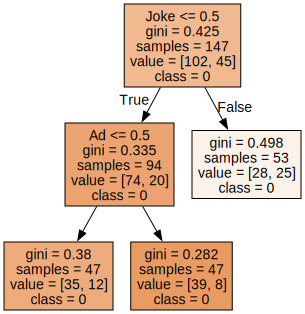

In [6]:
with open("tip_dt") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- class: 0



**Analysis**: We built a decision tree with ~76.5% accuracy on the test data. In a nutshell, our model provides 49 correct predictions for no-tip situations. However, 19 times it classifies an actual tip as no tip. Overall, our decision tree is best depicted and explained by the graphical representation shown above, using graphviz library. 

Let's take 3 situations to run through the decision tree and see how our model works:

1. **Advertisement**: When the waiter shows an advertisement, Joke = 0 and we proceed to the left node and because Ad = 1, we branch out to the right leaf and predict class as 0 or no tip.

2. **Joke**: If the waiter shares a joke on the card, we immediately conclude that the class is zero or there is no tip since J = 1 and our first condition is false. It also means that as per our model, telling a joke doesn't help the waiter's case of getting a tip!

3. **None**: When the waiter doesn't share any card, we branch out to the left node and arrive at the left leaf to predict class as 0 or no tip. Unfortunately for the waiter, our model still predicts no tip!